<a href="https://colab.research.google.com/github/Ayakhaled200/Projects/blob/main/Predict_Stock_Prices_using_Automated_Time_Series_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Navigate to the directory where your CSV file is located
import os
os.chdir("/content/drive/MyDrive/DS/")

# Import pandas
import pandas as pd

# Read the CSV file
df = pd.read_csv('BAJFINANCE.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [5]:
df.set_index('Date', inplace= True)

<Axes: xlabel='Date'>

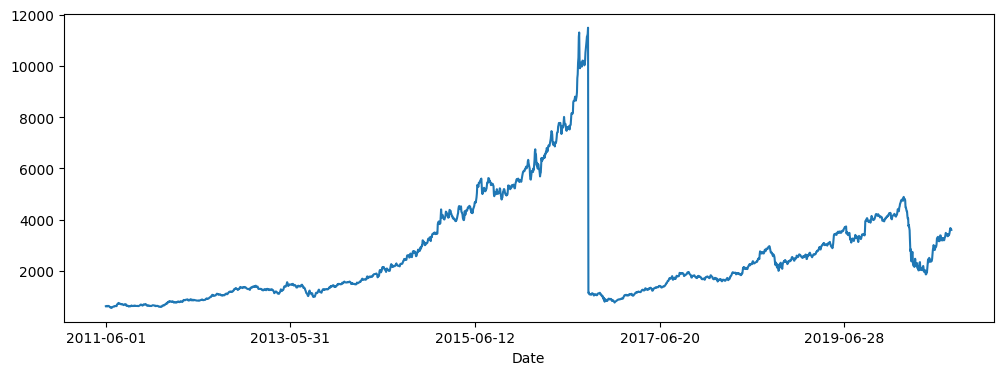

In [143]:
df['VWAP'].plot(figsize=(12,4))

###*observing* Seasonality

###Preprocessing Data

In [7]:
df.shape

(5070, 14)

In [8]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [9]:
df.dropna(inplace=True)

In [11]:
df.shape

(2291, 14)

In [12]:
data = df.copy()

In [14]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [15]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [16]:
lag_features = ['High', 'Low','Volume', 'Turnover', 'Trades']
window1 = 3
window2 = 7

In [17]:
for feature in lag_features:
    data[feature+'rolling_mean_3']=data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_7']=data[feature].rolling(window=window2).mean()

In [18]:
for feature in lag_features:
    data[feature+'rolling_std_3']=data[feature].rolling(window=window1).std()
    data[feature+'rolling_std_7']=data[feature].rolling(window=window2).std()

In [19]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,...,1.201388,NaN,2.309401,NaN,26980.871860,NaN,1.685217e+12,NaN,670.500559,NaN
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,...,1.625833,NaN,4.994080,NaN,27352.695339,NaN,1.710136e+12,NaN,148.769396,NaN
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,...,9.062422,NaN,8.008797,NaN,26391.221653,NaN,1.652377e+12,NaN,78.270897,NaN


In [20]:
data.shape

(2291, 34)

In [21]:
data.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
dtype: int64

In [22]:
data.dropna(inplace=True)

In [23]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [29]:
ind_features = ['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

In [83]:
train = data[:1800]
test = data[1800:]

In [95]:
train

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-09,BAJFINANCE,EQ,635.60,639.80,647.00,630.00,630.00,631.10,638.27,31252,...,12.769789,7.494911,15.011107,9.410145,13497.047986,18373.894011,8.665128e+11,1.155773e+12,354.841279,463.942320
2011-06-10,BAJFINANCE,EQ,631.10,641.85,648.25,618.55,621.10,622.20,634.16,30885,...,1.639360,8.227994,13.030765,9.501961,2434.970705,18047.331029,1.579562e+11,1.136003e+12,272.875429,448.020620
2011-06-13,BAJFINANCE,EQ,622.20,616.00,627.85,616.00,622.75,624.95,622.92,3981,...,11.434196,9.497080,7.456597,9.298317,15640.051929,17835.642665,9.982094e+11,1.123423e+12,557.373603,464.778596
2011-06-14,BAJFINANCE,EQ,624.95,625.00,628.95,619.95,621.20,622.10,625.35,5597,...,11.473593,10.198891,2.002707,9.293713,15088.183102,13139.472184,9.595224e+11,8.397765e+11,656.385050,455.234163
2011-06-15,BAJFINANCE,EQ,622.10,612.00,623.00,598.10,605.00,601.70,606.90,12590,...,3.165833,11.352292,11.643560,11.262712,4575.812970,12469.137006,2.733211e+11,7.983186e+11,150.639747,436.941971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-04,BAJFINANCE,EQ,2724.05,2724.00,2777.65,2683.50,2748.00,2746.30,2726.23,2606992,...,88.954937,79.489416,83.341306,107.041856,696998.737787,642979.884199,1.827289e+14,1.673270e+14,2794.744413,21708.856675
2018-09-05,BAJFINANCE,EQ,2746.30,2740.15,2764.80,2668.00,2704.45,2716.90,2712.53,1728455,...,63.129081,100.594924,24.113551,119.854378,483305.554092,570427.041296,1.375623e+14,1.467744e+14,21770.352164,17267.163548
2018-09-06,BAJFINANCE,EQ,2716.90,2729.00,2731.50,2671.40,2672.20,2684.10,2695.89,1147879,...,23.818183,113.135709,8.146779,118.187686,734609.476628,584307.816124,2.020435e+14,1.561692e+14,30923.312263,24013.596897


##Auto ARIMA

In [144]:
from pmdarima import auto_arima

In [145]:
model = auto_arima(y=train['VWAP'],exogenous = train[ind_features], trace =True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25013.840, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25015.795, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25015.799, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25011.876, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.35 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 7.936 seconds


####the lower the AIC the better will be ARIMA model

In [146]:
# import warnings
# warnings.filterwarnings('ignore')

In [147]:
#we have to fit the data so the model learn some kind of relation
model.fit(train['VWAP'], train[ind_features])

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [148]:
forecast_arima = model.predict(len(test), test[ind_features])

In [149]:
forecast_arima

1800    2623.207542
1801    2638.871507
1802    2624.667533
1803    2597.902408
1804    2614.922982
           ...     
2280    2810.577133
2281    2890.687146
2282    2864.577784
2283    2810.711269
2284    2462.958514
Length: 485, dtype: float64

In [150]:
# Set the index of forecast to match the index of test
forecast_arima.index = test.index

# Assign forecast to the 'Forecast_ARIMA' column in the DataFrame test
test['Forecast_ARIMA'] = forecast_arima


In [151]:
test.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7,Forecast_ARIMA
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-11,BAJFINANCE,EQ,2615.65,2621.00,2668.80,2562.25,2600.0,2600.75,2619.05,3357660,...,63.787942,56.544592,53.608580,1.130645e+06,816410.887112,2.905375e+14,2.170264e+14,40756.099335,32012.681782,2623.207542
2018-09-12,BAJFINANCE,EQ,2600.75,2617.95,2636.95,2516.10,2588.9,2594.00,2577.54,2682340,...,51.914260,40.110047,66.236890,9.025933e+05,835125.949241,2.325644e+14,2.156391e+14,31297.267202,34656.587966,2638.871507
2018-09-14,BAJFINANCE,EQ,2594.00,2630.50,2683.50,2626.25,2678.0,2672.20,2651.42,1795131,...,47.776811,55.315527,61.033875,7.836553e+05,800730.132185,2.018671e+14,2.036245e+14,31471.093038,33742.606344,2624.667533
2018-09-17,BAJFINANCE,EQ,2672.20,2660.00,2660.00,2588.25,2596.0,2604.60,2613.75,1455320,...,44.294307,55.950343,57.040858,6.335337e+05,818929.309318,1.593010e+14,2.094265e+14,35128.684296,34854.254176,2597.902408
2018-09-18,BAJFINANCE,EQ,2604.60,2610.00,2627.45,2559.00,2563.4,2570.40,2597.61,1449290,...,47.625517,33.719740,50.588419,1.979536e+05,780029.521271,5.634743e+13,2.006348e+14,10189.437390,32916.577887,2614.922982


<Axes: xlabel='Date'>

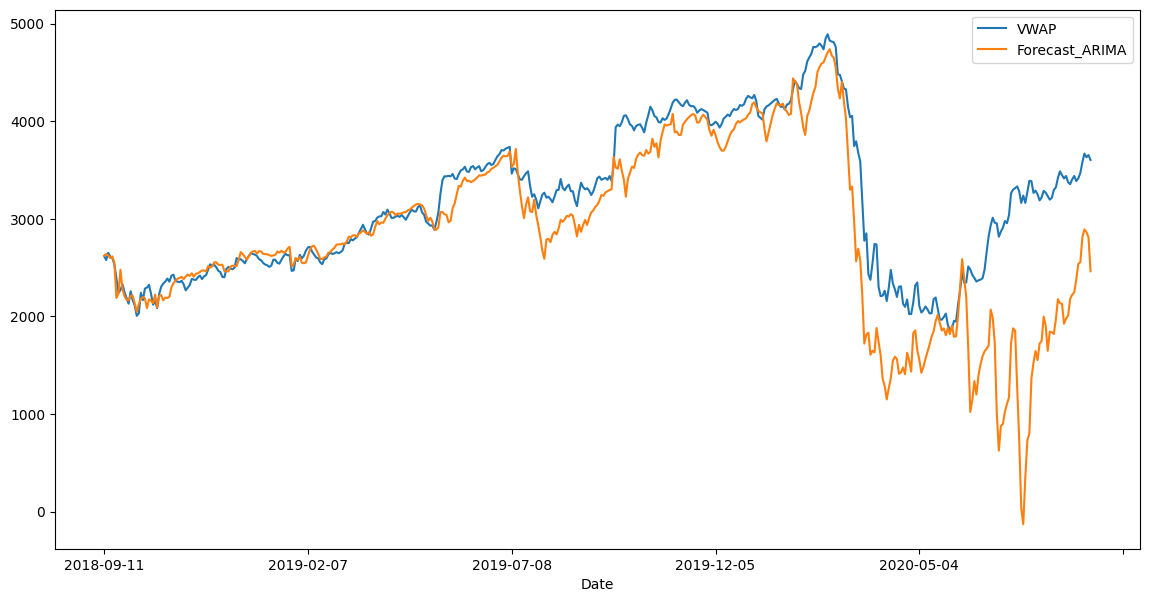

In [152]:
#check what is the trend for my forecasting
test[['VWAP', 'Forecast_ARIMA']].plot(figsize=(14,7))

In [153]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [154]:
np.sqrt(mean_squared_error(test['VWAP'], test['Forecast_ARIMA']))

635.706159936563

In [155]:
mean_absolute_error(test['VWAP'],test['Forecast_ARIMA'])

365.79407393377556

##ARIMA

In [137]:
from statsmodels.tsa.arima.model import ARIMA

# Specify the order for ARIMA model
order = (1, 0, 1)

# Create ARIMA model
arima_model = ARIMA(endog=train['VWAP'], exog=train[ind_features], order=order)

# Fit the ARIMA model
model = arima_model.fit()

# Make predictions with exogenous variables
forecast = model.predict(start=len(train), end=len(train) + len(test) - 1, exog=test[ind_features])


In [138]:
np.sqrt(mean_squared_error(test['VWAP'], forecast))

190.289344657344

In [139]:
mean_absolute_error(test['VWAP'],forecast)

124.87630152933266

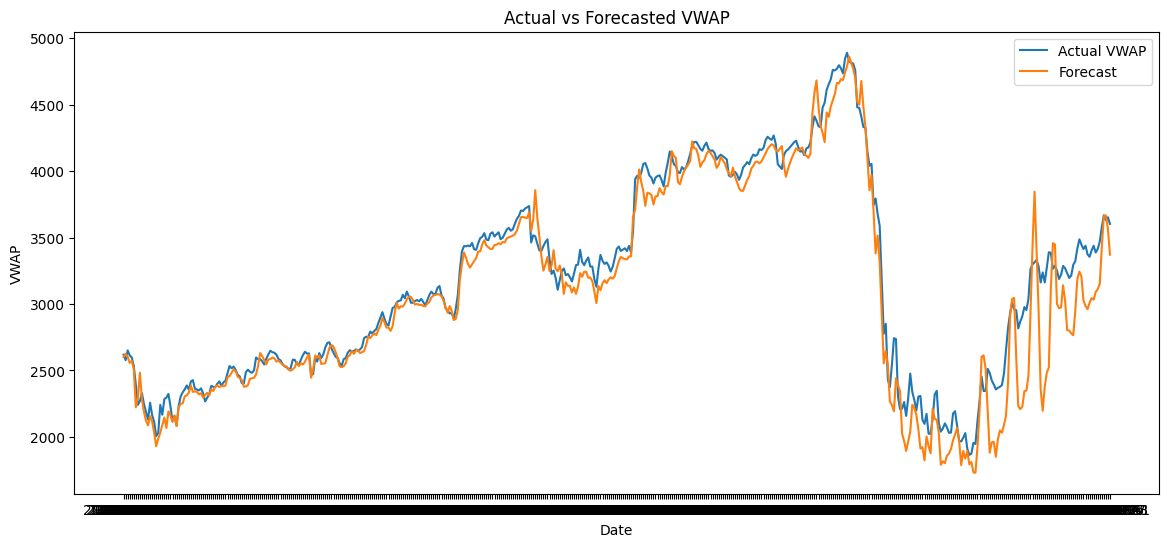

In [156]:
import matplotlib.pyplot as plt

# Create a new figure with a specified size
plt.figure(figsize=(14, 6))  # Adjust the width and height as needed

# Plot the actual VWAP values
plt.plot(test.index, test['VWAP'], label='Actual VWAP')

# Plot the forecasted values
plt.plot(test.index, forecast, label='Forecast')

# Set plot title and labels
plt.title('Actual vs Forecasted VWAP')
plt.xlabel('Date')
plt.ylabel('VWAP')
plt.legend()

# Show plot
plt.show()


###Tring to hypertune auto arima to find best value for the order
####Note, alwayse try the order with d = 0 and test the code, as auto arima doen't always choose the best order for prediction

In [141]:
from pmdarima import auto_arima

# Specify the range of orders to explore
start_p = 0  # starting value of p
d = 0       # differencing order
start_q = 0  # starting value of q
max_p = 3    # maximum value of p to explore
max_q = 3    # maximum value of q to explore

# Fit auto ARIMA model with all possible orders
model = auto_arima(y=train['VWAP'], exogenous=train[ind_features],
                   start_p=start_p, d=d, start_q=start_q, max_p=max_p, max_q=max_q,
                   seasonal=False, trace=True)

# Get the best order found by auto_arima
best_order = model.order

print("Best order:", best_order)



Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=34260.142, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=31955.657, Time=1.22 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=25031.622, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=25033.512, Time=0.60 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=25033.633, Time=0.22 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=30228.042, Time=5.13 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.81 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=25035.391, Time=1.60 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=25029.127, Time=1.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=30518.077, Time=0.77 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=25031.154, Time=0.57 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=25031.145, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   :